<a href="https://colab.research.google.com/github/Thuy01234567/AIO/blob/main/Modul3_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Bài tập 1**

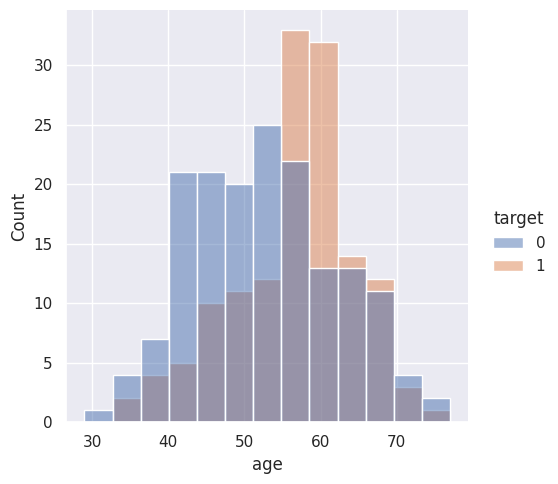

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df ['target'] = df.target.map({0: 0,1: 1, 2: 1, 3: 1, 4: 1})
df ['thal'] = df.thal.fillna(df.thal.mean())
df ['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
# sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim.
# đồ thị
sns.set_theme(style="darkgrid")
# Changed sns.distributions to sns.displot

sns.displot(data=df, x="age", hue="target")
plt.show()

Bài tập 2

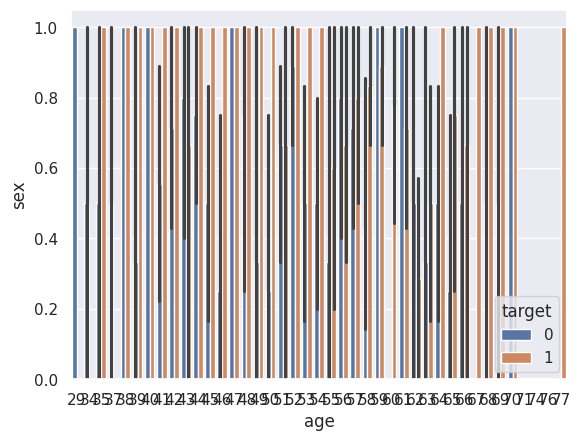

In [18]:
# sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim.
# barplot of age vs sex with hue = target
sns.set_theme(style="darkgrid")
sns.barplot(data=df, x="age", y="sex", hue="target")
plt.show()

Bài tập 3

In [20]:
!pip install scikit-learn

In [30]:
# Sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Bai tap 3
df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df ['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df ['thal'] = df.thal.fillna(df.thal.mean())
df ['ca'] = df.ca.fillna(df.ca.mean())

# Separate features(X) and target variable(y)
X = df.iloc [:,: -1].values
y = df.iloc [:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Use 20% of the data for testing

# Create a KNN classifier with specified parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Train the classifier
knn.fit(X_train, y_train)

cm_train = pd.crosstab(y_train, knn.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, knn.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


Bài tập 4

In [32]:
# bai tap 4
# sử dụng SVM cho dự đoán bệnh tim, sử dụng các tham số sau: kernel = ’rbf’,random_state=42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

X = df.iloc [:, : -1]. values
y = df.iloc [:, -1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
# your code here ***************************
# sử dụng SVM
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train)

cm_train = pd.crosstab(y_train, svm.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, svm.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1]) /len(y_train),2)
accuracy_for_test = np.round((cm_test [0][0] + cm_test [1][1]) /len(y_test),2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


BÀi tập 5

In [34]:
# bai tap 5
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)


X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

# your code here ***************************
# sử dụng Naive Bayes kernel = ’rbf’, random_state=42
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
cm_train = pd.crosstab(y_train, nb.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, nb.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


Bài tập 6

In [36]:
# bai tap 6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

X = df.iloc [:, : -1]. values
y = df.iloc [:, -1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

# your code here ***************************
# Sử dụng Decision Tree các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2
from sklearn.tree import DecisionTreeClassifier
nd=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)
nd.fit(X_train,y_train)
cm_train = pd.crosstab(y_train, nd.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, nd.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


Bài tập 7

In [37]:
# bai tap 7
from sklearn.del_selection import train_test_split
X_train,X_,st,,t,in, y_,, = train_test_split(X, y, t,_s, = 0.2,random_s,, = 42)


X = df.il.[:, : -1]. val,,y = df.iloc., -1]. values
,rom,klearn.model_.ection import train_test_split
X_train, X_test, y_trai, y_tes,,train,es,spli,(X, y, test_size = 0.2,r,do,ta, = 42)

# you,c,e here ***************************
#(sử dụng Random Forest các tham số sau: c.erion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=4,from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(criter,n='gini',max_depth=10,min_samples_split=2,n_estimators=10,random_state=42)
rd.fit(X_train,y_train)

cm_train = pd.crosstab(y_train, rd.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, rd.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.rou,(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for traini, set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


Bài tập 8

In [38]:
# bai tap 8
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)

X = df.iloc [:, : -1]. values
y = df.iloc [:, -1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)

# your code here ***************************
# sử dụng Adaboost các tham số sau: n_estimators=50, learning_rate=1.0
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(X_train,y_train)

cm_train = pd.crosstab(y_train, ad.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, ad.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for training set for Adaboost = {}'. format( accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'. format( accuracy_for_test))


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bài tập 9

In [40]:
# bai tap 9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)


X = df.iloc [:, : -1]. values
y = df.iloc [:, -1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

# your code here ***************************
# (sử dụng GradientBoost tham số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,min_samples_split=2,max_depth=3,random_state=42)
gb.fit(X_train,y_train)
cm_train = pd.crosstab(y_train, gb.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, gb.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train),2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test),2)
print('Accuracy for training set for GradientBoost = {}'.format( accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format( accuracy_for_test))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [43]:
# bai tap 10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,random_state = 42)


X = df.iloc [:, : -1]. values
y = df.iloc [:, -1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,random_state = 42)

# your code here ***************************
# Sử dụng XGboost cho dự đoán bệnh tim, các tham số sau: objective="binary:logistic", random_state=42, n_estimators = 100
from xgboost import XGBClassifier
xg=XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xg.fit(X_train, y_train)
cm_train = pd.crosstab(y_train, xg.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, xg.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print ()
accuracy_for_train = np.round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ),2)
accuracy_for_test = np.round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ),2)
print ('Accuracy for training set for XGboost = {}'.format ( accuracy_for_train ) )
print ('Accuracy for test set for XGboost = {}'.format ( accuracy_for_test ) )


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [50]:
# bai tap 11
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from xgboost import XGBClassifier
X = df.iloc [: , : -1]. values
y = df.iloc [: , -1]. values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,random_state = 42)

dtc = DecisionTreeClassifier ( random_state =42)
rfc = RandomForestClassifier ( random_state =42)
knn = KNeighborsClassifier ()
# Create an instance of XGBClassifier
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# your code here ********************
# dùng Stacking cho dự đoán bệnh tim

estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
es = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
es.fit(X_train, y_train)
cm_train = pd.crosstab(y_train, es.predict(X_train), rownames=['Actua'], colnames=['Predicted'])
cm_test = pd.crosstab(y_test, es.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.89
